### Stock Market Prediction And Forecasting Using Stacked LSTM

In [39]:
# collect stack data for apple
# preprocess train and test 
# create stacked lstm 
# predic 
# predict for 30 days
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [40]:
df=pd.read_csv('AAPL.csv')
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [41]:
df.shape

(1258, 15)

In [42]:
df1=df.reset_index()['close']
print(df1.shape)
print(df1)

(1258,)
0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64


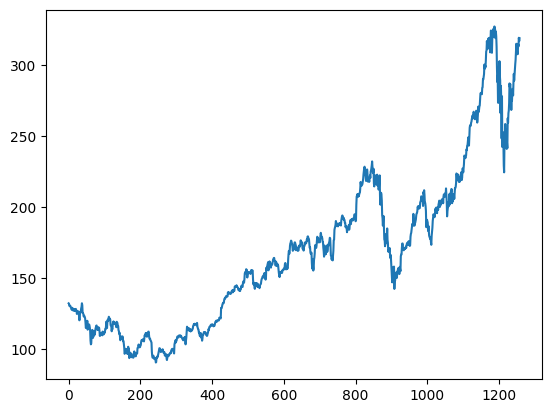

In [43]:
plt.plot(df1)

In [44]:
# the value will then lie between 0-1
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [45]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [46]:
# splitting dataset into train and test split


#cross-validation and random-seed
## train_test -> 0.65
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size

(817, 441)

In [47]:
train_data


array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [48]:
## pattern dikha toh repeat hoga 

# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [49]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [50]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(ytest.shape)

(716, 100)
(716,)
(340, 100)
(340,)


(None, None)

In [51]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(( X_train.shape[0] , X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1], 1))

In [52]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


c:\Users\anura\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [53]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - loss: 0.0253 - val_loss: 0.0568
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0012 - val_loss: 0.0068
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 8.1297e-04 - val_loss: 0.0035
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 5.6133e-04 - val_loss: 0.0037
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 5.6467e-04 - val_loss: 0.0034
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 5.6491e-04 - val_loss: 0.0036
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 5.6580e-04 - val_loss: 0.0032
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 5.1799e-04 - val_loss: 0.0032
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 5.0756e-04 - val_loss: 0.0031
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 5.3719e-04 - val_loss: 0.0033
Epoch 12/100
12/12 

In [55]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [56]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [57]:
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

141.8949036182284

In [58]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

235.8718384087948

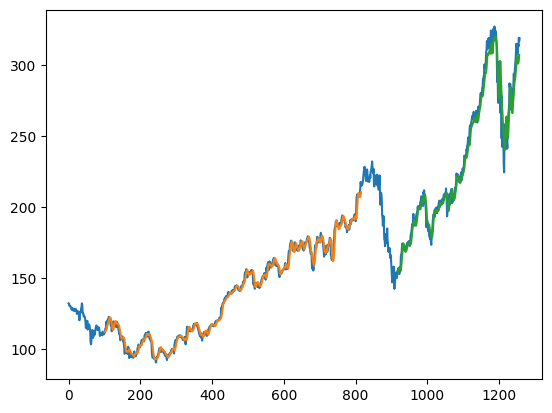

In [59]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [60]:
len(test_data)

441

In [61]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [62]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [63]:
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [64]:
# demonstrate prediction for next 10 days
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.93402237]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.

In [65]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [66]:
len(df1)

1258

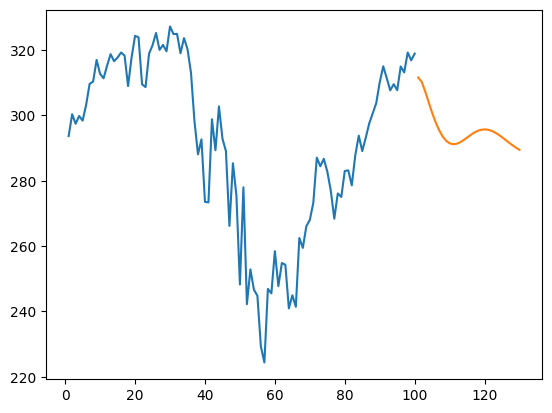

In [67]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

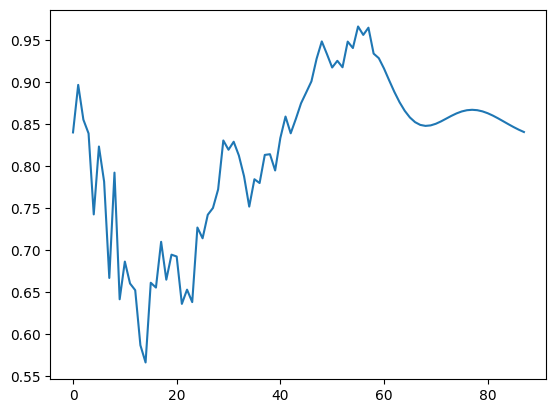

In [68]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

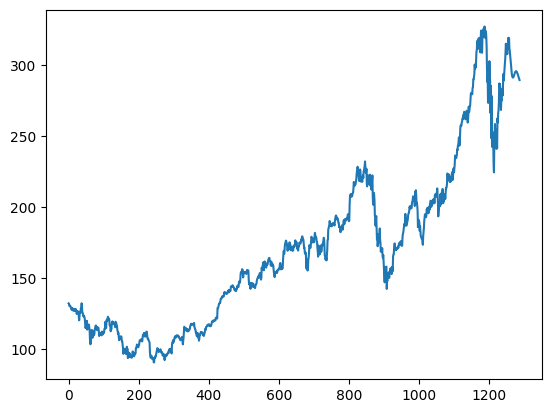

In [69]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)